In [1]:
#Comandos para importar as bibliotecas que serão utilizadas

import pandas as pd
from pandas import Series, DataFrame

import folium
from folium import plugins

import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [2]:
#Comandos para ler os dados de roubos que serão utilizados e que estão na pasta data.

path = 'data/'
startName = 'roubos_'
filenames = {'janeiro','fevereiro','marco','abril','maio','junho','julho','agosto','setembro'}
extension = '.csv'
encoding = "ISO-8859-1"
sep=';'

In [3]:
#Comandos para gerar um dataframe com todos os arquivos lidos

def populaDataFrame():
    dfList = list()

    for file in filenames:
        df= pd.DataFrame(pd.read_csv(path+startName+file+extension, encoding = encoding, sep = sep))
        dfList.append(df)

    df = pd.concat(dfList)
    return df

In [4]:
df = populaDataFrame()
df.reset_index()

,index,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,BAIRRO,CIDADE,UF,LATITUDE,LONGITUDE,DESCRICAOLOCAL,EXAME,SOLUCAO,DELEGACIA_NOME,DELEGACIA_CIRCUNSCRICAO,ESPECIE,RUBRICA,DESDOBRAMENTO,STATUS,NOMEPESSOA,TIPOPESSOA,VITIMAFATAL,RG,RG_UF,NATURALIDADE,NACIONALIDADE,SEXO,DATANASCIMENTO,IDADE,ESTADOCIVIL,PROFISSAO,GRAUINSTRUCAO,CORCUTIS,NATUREZAVINCULADA,TIPOVINCULO,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,0,2018,1412,1412/2018,01/05/2018 06:46,01/05/2018 06:56,01/05/2018,DE MADRUGADA,01/05/2018,01/05/2018 06:46,Desconhecida,NÃ£o,NaN,RUA VEREADOR GERALDO NOGUEIRA DA SILVA,1.0,RES ESPERANÃA,CACAPAVA,SP,-23.113413,-45.708161,Via pÃºblica,NaN,APRECIAÃÃO DO DELEGADO TITULAR,DEL.POL.CACAPAVA,DEL.POL.CACAPAVA,TÃ­tulo II - PatrimÃ´nio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EVN3622,SP,CACAPAVA,Preta,CHEVROLET/CLASSIC LS,2011.0,2012.0,AUTOMOVEL,NaN,NaN
1,1,2018,1392,1392/2018,01/05/2018 12:44,01/05/2018 13:23,30/04/2018,A NOITE,01/05/2018,01/05/2018 12:44,Desconhecida,NÃ£o,NaN,RUA BACABAL,1310.0,PARQUE INDUSTRIAL,S.JOSE DOS CAMPOS,SP,-23.237585,-45.904540,Via pÃºblica,NaN,ENCAMINHAMENTO DP ÃREA DO FATO,DEL.SEC.POL.SJCAMPOS PL SUL,03Âº D.P. S.JOSE DOS CAMPOS,LocalizaÃ§Ã£o e/ou DevoluÃ§Ã£o,LocalizaÃ§Ã£o/ApreensÃ£o e Entrega de veÃ­culo,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
2,2,2018,1399,1399/2018,01/05/2018 17:57,01/05/2018 18:09,01/05/2018,A TARDE,01/05/2018,01/05/2018 17:57,Desconhecida,NÃ£o,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ResidÃªncia,NaN,ENCAMINHAMENTO DP ÃREA DO FATO,DEL.SEC.POL.SJCAMPOS PL SUL,03Âº D.P. S.JOSE DOS CAMPOS,TÃ­tulo II - PatrimÃ´nio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EAY2521,SP,S.JOSE DOS CAMPOS,Prata,GM/PRISMA MAXX,2008.0,2008.0,AUTOMOVEL,NaN,NaN
3,3,2018,1406,1406/2018,02/05/2018 10:26,02/05/2018 10:41,01/05/2018,DE MADRUGADA,02/05/2018,02/05/2018 10:26,Desconhecida,NÃ£o,NaN,RODOVIA SP 66,1.0,CONJUNTO INDUSTRIAL EMPRESARIAL ELDORADO,S.JOSE DOS CAMPOS,SP,-23.263817,-45.913265,Via pÃºblica,NaN,APRECIAÃÃO DO DELEGADO TITULAR,DEL.SEC.POL.SJCAMPOS PL SUL,03Âº D.P. S.JOSE DOS CAMPOS,TÃ­tulo II - PatrimÃ´nio (arts. 155 a 183),Roubo (art. 157) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CBW6275,SP,S.JOSE DOS CAMPOS,Prata,VW/GOL 1000,1995.0,1995.0,AUTOMOVEL,NaN,NaN
4,4,2018,702,702/2018,02/05/2018 09:40,02/05/2018 10:59,02/05/2018,PELA MANHÃ,02/05/2018,02/05/2018 09:40,Desconhecida,NÃ£o,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ResidÃªncia,NaN,APRECIAÃÃO DO DELEGADO TITULAR,01Âº D.P. S.JOSE DOS CAMPOS,01Âº D.P. S.JOSE DOS CAMPOS,LocalizaÃ§Ã£o e/ou DevoluÃ§Ã£o,LocalizaÃ§Ã£o/ApreensÃ£o e Entrega de veÃ­culo,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
5,5,2018,173,173/2018,02/05/2018 15:21,02/05/2018 17:04,02/05/2018,PELA MANHÃ,02/05/2018,02/05/2018 15:21,Desconhecida,NÃ£o,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ResidÃªncia,IC,APRECIAÃÃO DO DELEGADO TITULAR,DEL.INF.JUV. S.JOSE DOS CAMPOS,03Âº D.P. S.JOSE DOS CAMPOS,Ato infracional,A.I.-ReceptaÃ§Ã£o (art. 180) - VEICULO,NaN,Consumado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,6,2018,405,405/2018,02/05/2018 16:24,02/05/2018 17:35,02/05/2018,PELA MANHÃ,02/05/2018,02/05/2018 16:24,Desconhecida,NÃ£o,NaN,RODOVIA PRESIDENTE DUTRA KM,140.0,EUGÃNIO DE MELO,S.JOSE DOS CAMPOS,SP,-23.158296,-45.798302,Rodovia/Estrada,NaN,ENCAMINHAMENTO DP ÃREA DO FATO,01Âº D.P. LORENA,05Âº D.P. S.JOSE DOS CAMPOS,TÃ­tulo II - PatrimÃ´nio (arts. 155 a

In [5]:
#Comando para criar um novo dataframe e armazena-lo em uma variável com os dados que utilizaremos para gerar um mapa de calor
geolocalizacoes = df[['LATITUDE', 'LONGITUDE']]

In [6]:
#Comando para identificar os valores nulos armazenados na variável
geolocalizacoes.isnull().sum()

LATITUDE     113
LONGITUDE    113
dtype: int64

In [7]:
#Comando para remover os valores nulos
geolocalizacoes.dropna(inplace=True)

c:\users\felip\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
#Comandos para gerar um mapa de calor com os dados da variável criada a partir das latitudes e longitutes fornecidas pelos dados das planilhas, utilizando a biblioteca folium.
#Créditos a Guilherme Faria https://github.com/guilhermeFaria/Data-Analysis-stolen-cars

coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=12)
 
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
    
mapa.add_child(plugins.HeatMap(coordenadas))

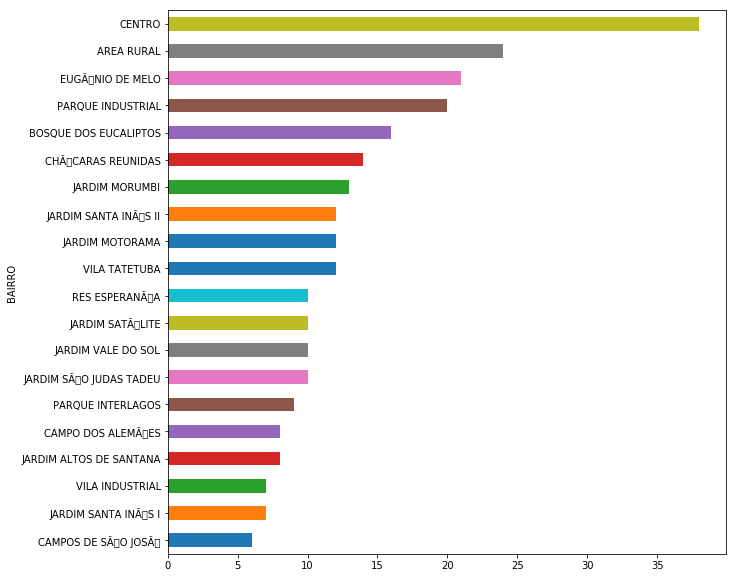

In [9]:
#Comando para gerar um gráfico dos bairros com os maiores índices de roubos na região

df.groupby('BAIRRO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

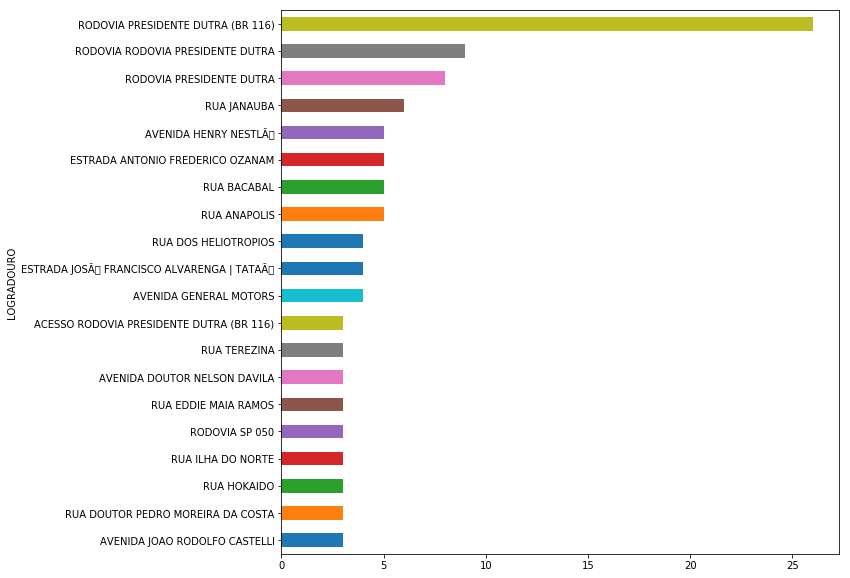

In [11]:
#Comando para gerar um gráfico das ruas com os maiores índices de roubos na região

df.groupby('LOGRADOURO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

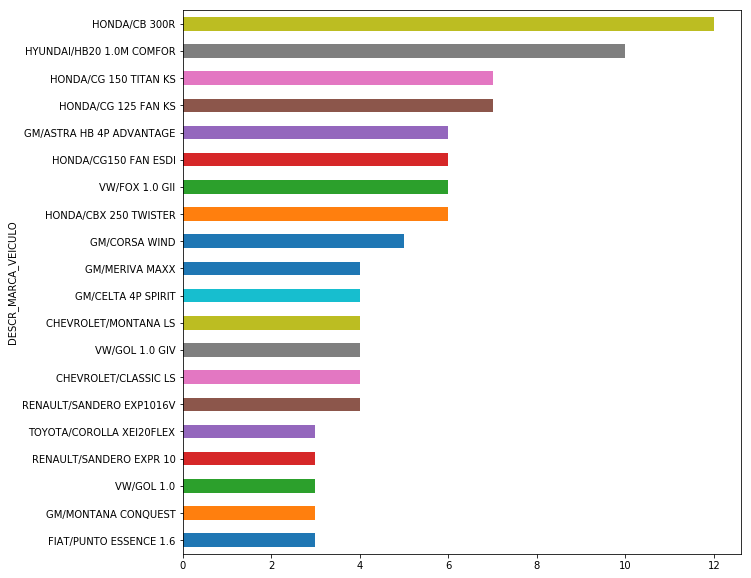

In [12]:
#Comando para gerar um gráfico dos modelos de carros com os maiores índices de roubos na região

df.groupby('DESCR_MARCA_VEICULO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

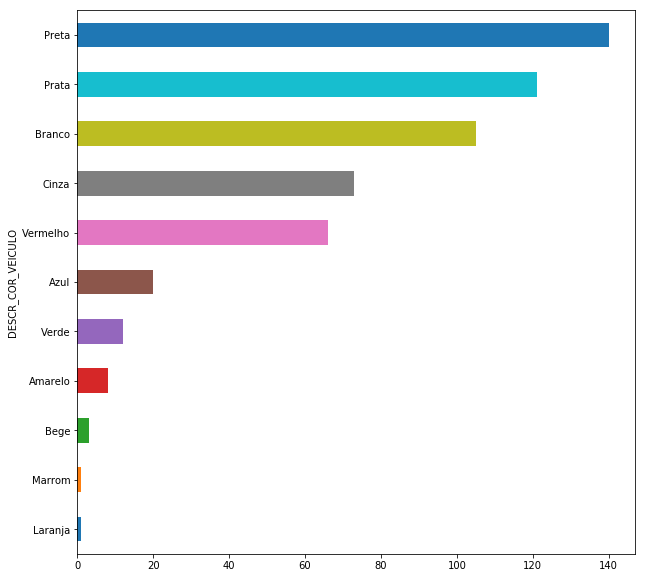

In [13]:
#Comando para gerar um gráfico das cores de veículos com os maiores índices de roubos na região

df.groupby('DESCR_COR_VEICULO').size().sort_values().tail(20).plot(kind='barh', figsize=(10,10))

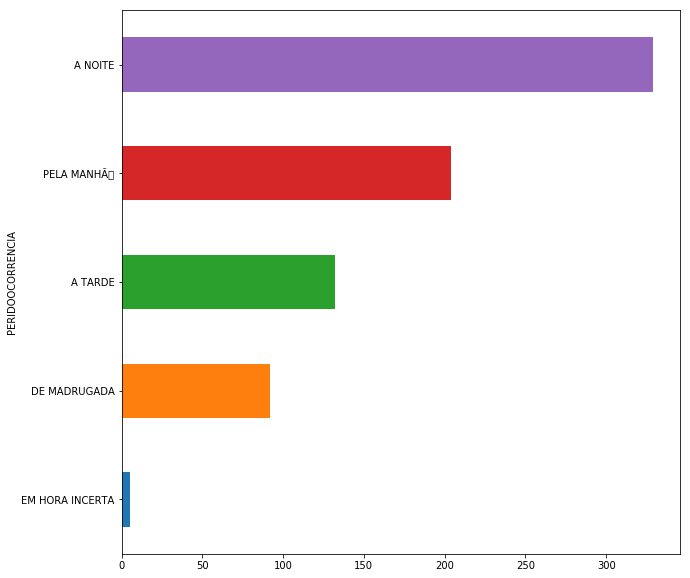

In [14]:
#Comando para gerar um gráfico dos períodos com os maiores índices de roubos na região

df.groupby('PERIDOOCORRENCIA').size().sort_values().tail(10).plot(kind='barh', figsize=(10,10))